<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

<b>Импорт библиотек и выборок</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import levene

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

from sklearn.metrics import mean_absolute_error, make_scorer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

TARGETS = ['rougher.output.recovery', 'final.output.recovery']

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date') 
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

<b>Изучение данных из файлов</b>

In [3]:
def analyze_df(df):
    rows_count, columns_count = df.shape
    print('Количество столбцов:', columns_count)
    print('Количество строк:', rows_count)
    print('Количество пропусков:', df.isna().sum().sum())
    print('Количество дубликатов:', df.duplicated().sum())
    display(df.head())
    display(df.describe())
    df.info()

In [4]:
analyze_df(train_df)

Количество столбцов: 86
Количество строк: 14149
Количество пропусков: 4100
Количество дубликатов: 0


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
analyze_df(test_df)

Количество столбцов: 52
Количество строк: 5290
Количество пропусков: 90
Количество дубликатов: 0


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [6]:
analyze_df(full_df)

Количество столбцов: 86
Количество строк: 19439
Количество пропусков: 4481
Количество дубликатов: 0


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

<b>Вывод:</b>
   1. Большое количество пропусков; <br>
   2. В тестовой выборке отсутсвуют некоторые столбцы;
   3. Даты записаны как строки.

<b>Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE.</b>

In [7]:
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']

In [8]:
train_df['recovery_calculation'] = ((C*(F-T))/(F*(C-T)))*100
train_df['recovery_calculation'].mean()

82.70450164550293

In [9]:
train_df['rougher.output.recovery'].mean()

82.70450164550293

Значения совпадают.

In [10]:
print('Значение MAE:', mean_absolute_error(train_df['recovery_calculation'], train_df['rougher.output.recovery']))

Значение MAE: 9.73512347450521e-15


Эффективность обогащения рассчитана правильно.

<b>Проанализируем признаки, недоступные в тестовой выборке</b>

In [11]:
missing_columns =  list(set(train_df) - set(test_df))
missing_columns

['primary_cleaner.output.concentrate_pb',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.tail_au',
 'rougher.output.recovery',
 'final.output.tail_sol',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_pb',
 'rougher.output.tail_ag',
 'recovery_calculation',
 'primary_cleaner.output.concentrate_ag',
 'rougher.output.concentrate_sol',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_ag',
 'final.output.recovery',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.au_pb_ratio',
 'final.output.tail_pb',
 'final.output.tail_ag',
 'final.output.concentrate_au',
 'secondary_cleaner.output.tail_pb',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.tail_sol',
 'final.output.concentrate_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.output.tail_au',
 'rougher.output.tail_sol',
 'rougher.calculation.floatbank11_sulfate

В тестовой выборке отсутствуют признаки параметров продуктов на каждом из этапов технологического процесса.

Добавим целевые показатели в датасет test_df из датасета full_df, в качестве ключа использовав date

In [12]:
test_df = test_df.merge(full_df[TARGETS].loc[test_df.index], on='date', how='left')

Пропущенные значения нужно заполнить, можно использовать метод fillna(method="ffill").Пропуски заполнятся предыдущими по индексу значениями.

In [13]:
datasets = [train_df, test_df, full_df]

In [14]:
for dataset in datasets:
    dataset.fillna(method = 'ffill', inplace = True)

<b>Вывод по 1 главе:</b>
   1. Убедились, что эффективность обогащения рассчитана правильно; 
   2. Проверили признаки, которые не доступны в тестовой выборке;
   3. Обработали пропуски.

## Анализ данных

<b>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.</b>

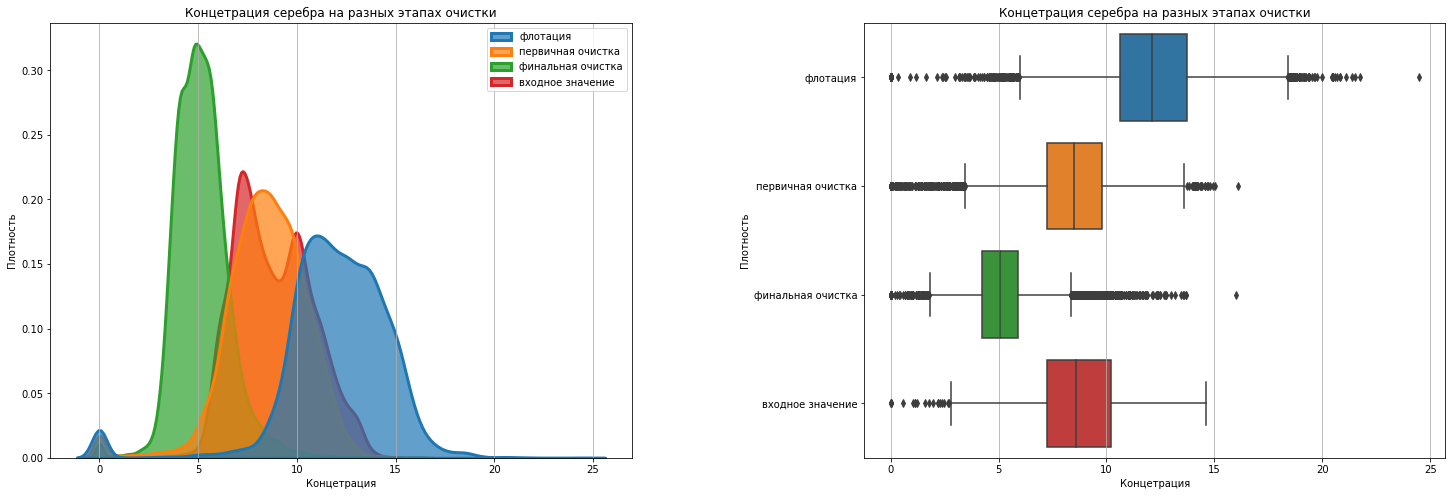

In [20]:
#отфильтруем даные для серебра
argentum = full_df[['rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag',
                 'rougher.input.feed_ag'  ]]
#переименуем столбцы для лучшей читаемости
argentum = argentum.rename(columns={'rougher.input.feed_ag' : 'входное значение',
                                'rougher.output.concentrate_ag': 'флотация', 
                              'primary_cleaner.output.concentrate_ag': 'первичная очистка', 
                              'final.output.concentrate_ag': 'финальная очистка'})
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(25, 8))
fig.subplots_adjust(wspace=.4)
sns.kdeplot(data=argentum, fill=True, common_norm=False,
                alpha=0.7, linewidth=3, ax=ax)
sns.boxplot(data=argentum, ax=ax1, orient='h')

ax.xaxis.grid(True)
ax1.xaxis.grid(True)
ax.set_xlabel('Концетрация')
ax.set_ylabel('Плотность')
ax.set_title('Концетрация серебра на разных этапах очистки')
ax1.set_xlabel('Концетрация')
ax1.set_ylabel('Плотность')
ax1.set_title('Концетрация серебра на разных этапах очистки')

plt.show();

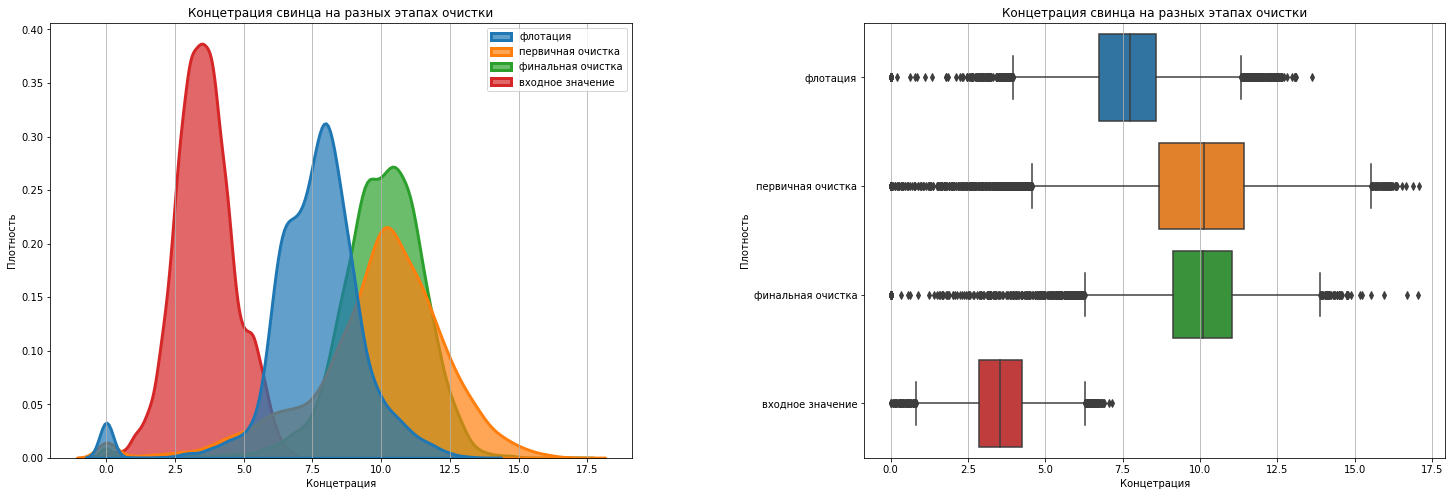

In [17]:
#отфильтруем даные для свинца
plumbum = full_df[['rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb',
                  'rougher.input.feed_pb']]
#переименуем столбцы для лучшей читаемости
plumbum = plumbum.rename(columns={'rougher.input.feed_pb' : 'входное значение',
                                'rougher.output.concentrate_pb': 'флотация', 
                              'primary_cleaner.output.concentrate_pb': 'первичная очистка', 
                              'final.output.concentrate_pb': 'финальная очистка'})
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(25, 8))
fig.subplots_adjust(wspace=.4)
sns.kdeplot(data=plumbum, fill=True, common_norm=False,
                alpha=0.7, linewidth=3, ax=ax)
sns.boxplot(data=plumbum, ax=ax1, orient='h')

ax.xaxis.grid(True)
ax1.xaxis.grid(True)
ax.set_xlabel('Концетрация')
ax.set_ylabel('Плотность')
ax.set_title('Концетрация свинца на разных этапах очистки')
ax1.set_xlabel('Концетрация')
ax1.set_ylabel('Плотность')
ax1.set_title('Концетрация свинца на разных этапах очистки')

plt.show();

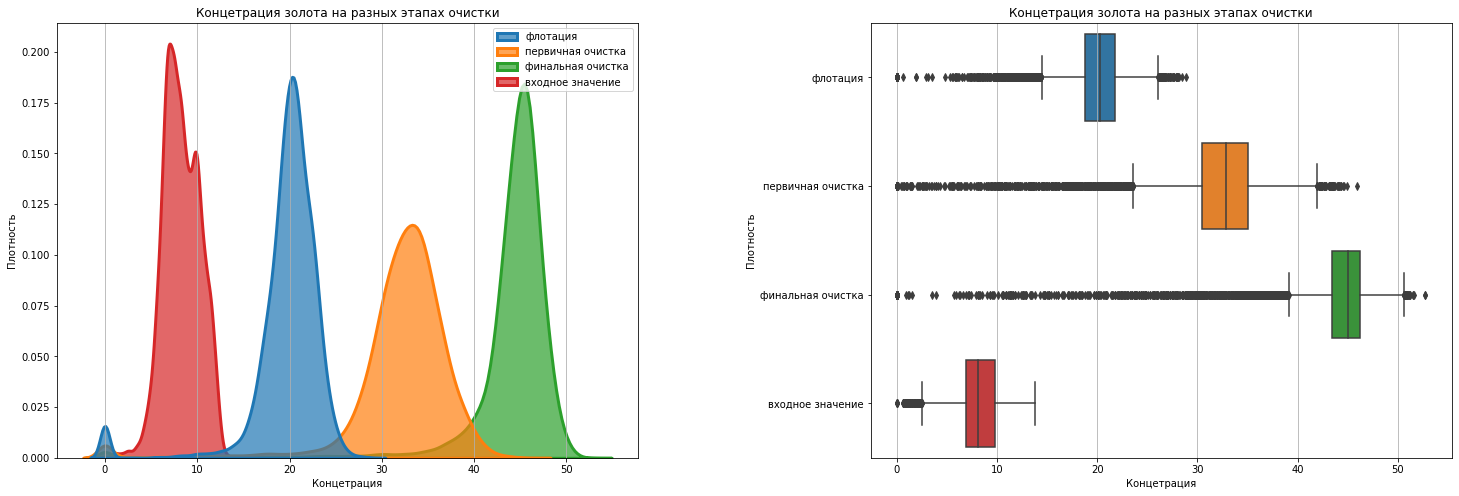

In [18]:
#отфильтруем даные для золота
aurum = full_df[['rougher.output.concentrate_au', 
             'primary_cleaner.output.concentrate_au', 
             'final.output.concentrate_au', 
                'rougher.input.feed_au']]

aurum = aurum.rename(columns={'rougher.input.feed_au' : 'входное значение',
                                'rougher.output.concentrate_au': 'флотация', 
                              'primary_cleaner.output.concentrate_au': 'первичная очистка', 
                              'final.output.concentrate_au': 'финальная очистка'})

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(25, 8))
fig.subplots_adjust(wspace=.4)
sns.kdeplot(data=aurum, fill=True, common_norm=False,
                alpha=0.7, linewidth=3, ax=ax)
sns.boxplot(data=aurum, ax=ax1, orient='h')

ax.xaxis.grid(True)
ax1.xaxis.grid(True)
ax.set_xlabel('Концетрация')
ax.set_ylabel('Плотность')
ax.set_title('Концетрация золота на разных этапах очистки')
ax1.set_xlabel('Концетрация')
ax1.set_ylabel('Плотность')
ax1.set_title('Концетрация золота на разных этапах очистки')
plt.show();

Вывод:
   1. Концентрация серебра уменьшается на каждой стадии очистки. График имеет отрицательно-линейный характер;
   2. Концетрация свинца увеличивается на каждой стадии очистки. График имеет положительно-линейный характер со стадии флотации до первичной очистки. Далее концетрация вещества увеличивается незначительно;
   3. Концетрация золота увеличивается на каждой стадии очистки. График имеет положительно-линейный характер.

<b>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</b>

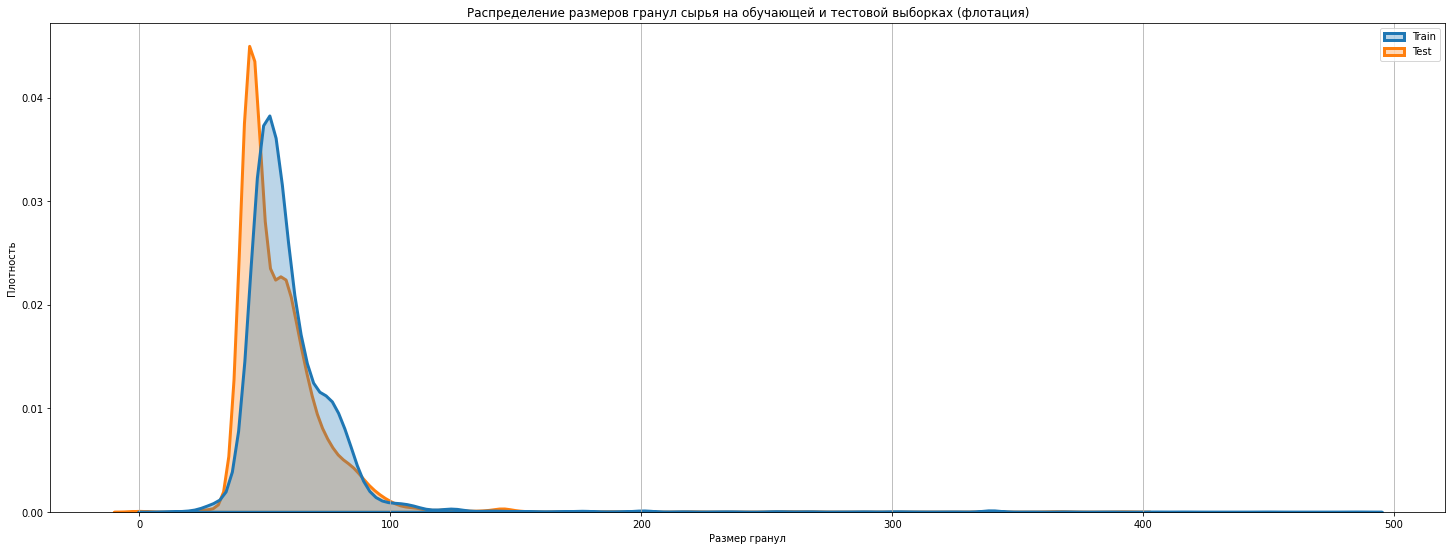

In [105]:
rougher = {
    'Train' : np.array(train_df['rougher.input.feed_size']),
    'Test' : np.array(test_df['rougher.input.feed_size'])
}
fig, (ax) = plt.subplots(figsize=(25, 9))
fig.subplots_adjust(wspace=.4)
sns.kdeplot(data=rougher, fill=True, common_norm=False,
                alpha=0.3, linewidth=3)

ax.xaxis.grid(True)

ax.set_xlabel('Размер гранул')
ax.set_ylabel('Плотность')
ax.set_title('Распределение размеров гранул сырья на обучающей и тестовой выборках (флотация)')
plt.show();

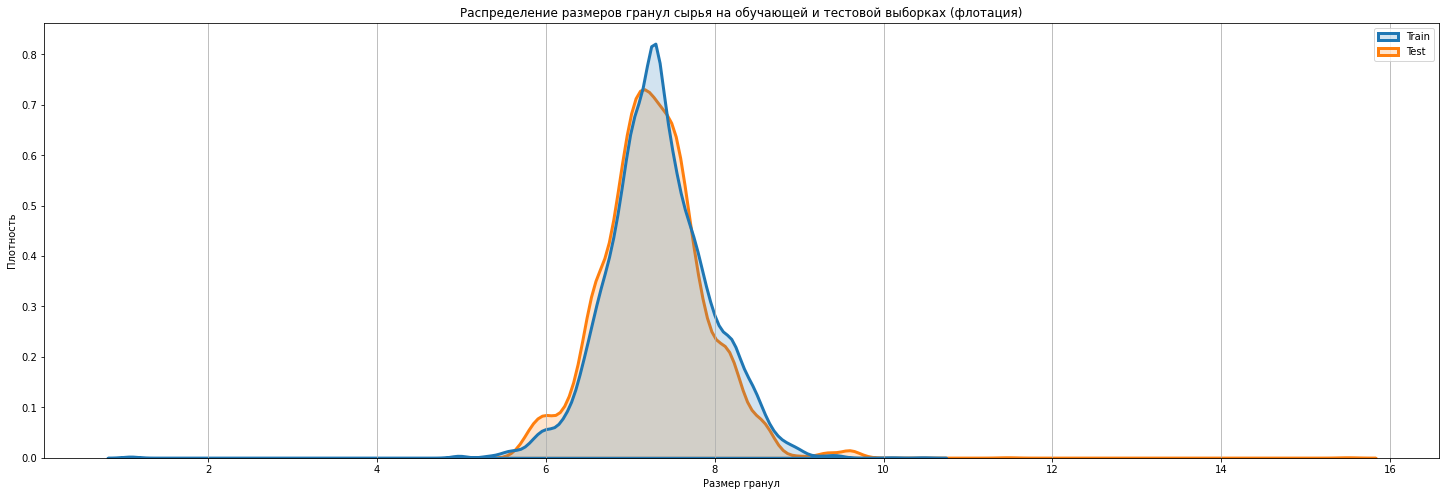

In [102]:
primary = {
    'Train' : np.array(train_df['primary_cleaner.input.feed_size']),
    'Test' : np.array(test_df['primary_cleaner.input.feed_size'])
}
fig, (ax) = plt.subplots(figsize=(25, 8))
fig.subplots_adjust(wspace=.4)
sns.kdeplot(data=primary, fill=True, common_norm=False,
                alpha=0.2, linewidth=3)

ax.xaxis.grid(True)

ax.set_xlabel('Размер гранул')
ax.set_ylabel('Плотность')
ax.set_title('Распределение размеров гранул сырья на обучающей и тестовой выборках (флотация)')
plt.show();

Распределения размеров гранул сырья на первом этапе очистки совпадает и похоже на нормальное распределение.

Распределения размеров гранул сырья на этапе флотации похожи. Тестовая выборка смещена влево.

С помощью Теста Левене(Критерий Левене) оценим равенство дисперсий.

In [20]:
stat, p = levene(train_df['rougher.input.feed_size'], test_df['rougher.input.feed_size'])
p

0.6605153520089053

Достаточно высокий показатель Критерия Левене. Будем считать, что распределения размеров гранул сырья на обучающей и тестовой выборках совпадают.

In [21]:
stat, p = levene(train_df['primary_cleaner.input.feed_size'], test_df['primary_cleaner.input.feed_size'])
p

0.9823609752105191

Крайне высокий показатель Критерия Левене. Распределения размеров гранул сырья на обучающей и тестовой выборках совпадают.

<b>Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</b>

In [22]:
sum_rougher_before = full_df[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb',
                   'rougher.output.tail_au', 
                   'rougher.input.feed_sol']].sum(axis = 1)

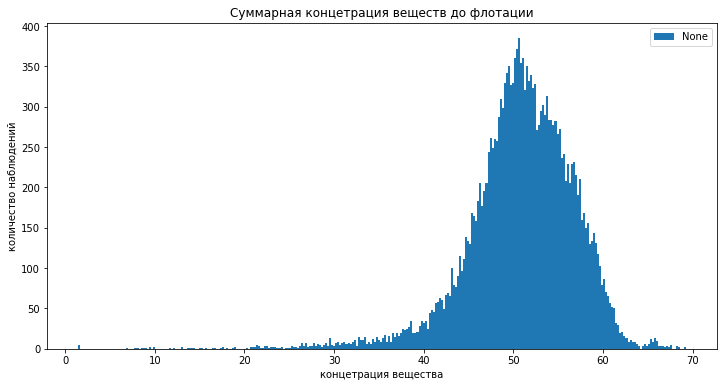

In [23]:
sum_rougher_before.plot(kind = 'hist', bins = 300, figsize = (12,6))
plt.xlabel('концетрация вещества');
plt.ylabel('количество наблюдений');
plt.legend();
plt.title('Суммарная концетрация веществ до флотации');

In [24]:
sum_rougher_after = full_df[['rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_pb',
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis = 1)

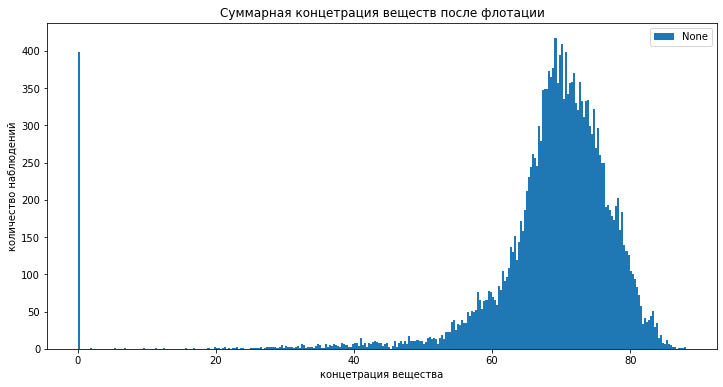

In [25]:
sum_rougher_after.plot(kind = 'hist', bins = 300, figsize = (12,6))
plt.xlabel('концетрация вещества');
plt.ylabel('количество наблюдений');
plt.legend();
plt.title('Суммарная концетрация веществ после флотации');

In [26]:
sum_primary = full_df[['primary_cleaner.output.concentrate_ag', 
                   'primary_cleaner.output.concentrate_pb',
                   'primary_cleaner.output.concentrate_sol', 
                   'primary_cleaner.output.concentrate_au']].sum(axis = 1)

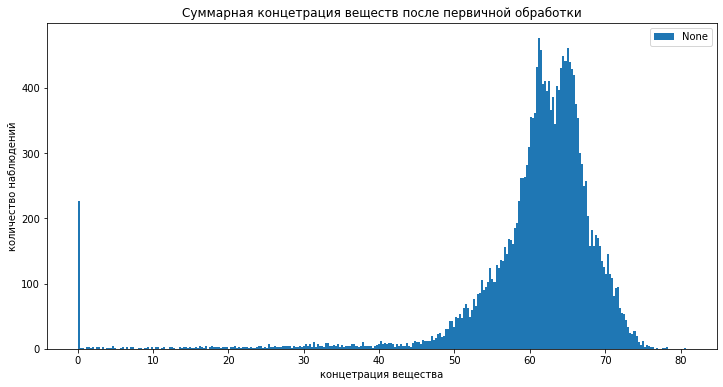

In [27]:
sum_primary.plot(kind = 'hist', bins = 300, figsize = (12,6))
plt.xlabel('концетрация вещества');
plt.ylabel('количество наблюдений');
plt.legend();
plt.title('Суммарная концетрация веществ после первичной обработки');

In [28]:
sum_final = full_df[['final.output.concentrate_ag', 
                   'final.output.concentrate_pb',
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis = 1)

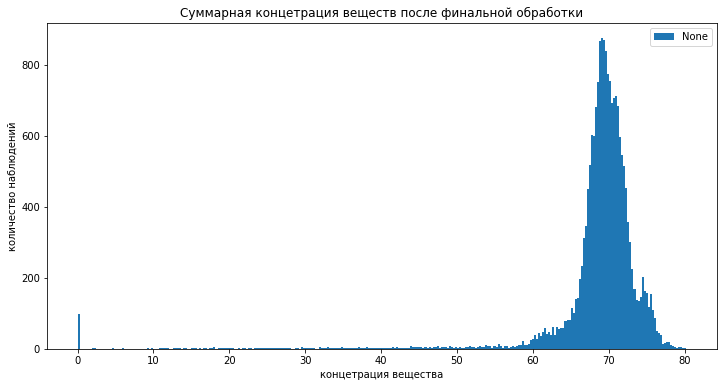

In [29]:
sum_final.plot(kind = 'hist', bins = 300, figsize = (12,6))
plt.xlabel('концетрация вещества');
plt.ylabel('количество наблюдений');
plt.legend();
plt.title('Суммарная концетрация веществ после финальной обработки');

Присутствуют заметные выбросы в нуле. Следует их удалить.

Можно отметить, что концентрация всех элементов к финалу очистки стала плотнее; <br>
В начальной руде диапазон концентрации элементов находился от 40 до 75; <br>
После финальной очистки диапазон ужался и находится приблизительно от 62 до 78; <br>
Это произошло вследствие того, что во время очистки пустая руда отфильтровалась <br>

<br>
Концентрация элементов в хвостах на этапах очистки, практически, не изменялась.

In [30]:
train_df = train_df[(train_df['final.output.concentrate_ag'] > 1) & (train_df['final.output.concentrate_pb'] > 1)
                 & (train_df['final.output.concentrate_sol'] > 1) & (train_df['final.output.concentrate_au'] > 1) &
                  (train_df['primary_cleaner.output.concentrate_ag'] > 1) & (train_df['primary_cleaner.output.concentrate_pb'] > 1)
                 & (train_df['primary_cleaner.output.concentrate_sol'] > 1) & (train_df['primary_cleaner.output.concentrate_au'] > 1)
                 & (train_df['rougher.output.concentrate_ag'] > 1) & (train_df['rougher.output.concentrate_pb'] > 1)
                   & (train_df['rougher.output.concentrate_sol'] > 1) & (train_df['rougher.output.concentrate_au'] > 1)
                    & (train_df['rougher.input.feed_ag'] > 1) & (train_df['rougher.input.feed_pb'] > 1)
                    & (train_df['rougher.output.tail_au'] > 1) & (train_df['rougher.input.feed_sol'] > 1)]  


full_df = full_df[(full_df['final.output.concentrate_ag'] > 1) & (full_df['final.output.concentrate_pb'] > 1)
                 & (full_df['final.output.concentrate_sol'] > 1) & (full_df['final.output.concentrate_au'] > 1) &
                  (full_df['primary_cleaner.output.concentrate_ag'] > 1) & (full_df['primary_cleaner.output.concentrate_pb'] > 1)
                 & (full_df['primary_cleaner.output.concentrate_sol'] > 1) & (full_df['primary_cleaner.output.concentrate_au'] > 1)
                 & (full_df['rougher.output.concentrate_ag'] > 1) & (full_df['rougher.output.concentrate_pb'] > 1)
                   & (full_df['rougher.output.concentrate_sol'] > 1) & (full_df['rougher.output.concentrate_au'] > 1)
                    & (full_df['rougher.input.feed_ag'] > 1) & (full_df['rougher.input.feed_pb'] > 1)
                    & (full_df['rougher.output.tail_au'] > 1) & (full_df['rougher.input.feed_sol'] > 1)]           

<b>Вывод по 2 главе:</b>
   1. Рассмотрели, как менялась концетрация металлов (Au, Ag, Pb) на различных этапах очистки; 
   2. Убедились, что распределения размеров гранул сырья на обучающей и тестовой выборках совпадают;
   3. Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. .

##  Модель

<b>Напишем функцию для вычисления итоговой sMAPE</b>

In [31]:
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    divider = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / divider) * 100 
    
    
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_final, target_predictions_final)

In [32]:
smape_scorer = make_scorer(calculate_final_smape, greater_is_better=False)

<b>Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.</b>

Удалим из тренировочной выборки те признаки, которых нет в тестовой.


In [33]:
train_df = train_df.drop(list(set(train_df) - set(test_df)), axis = 1)

In [34]:
print(train_df.shape)
print(test_df.shape)

(11386, 54)
(5290, 54)


<b>Дерево принятия решений</b>

In [35]:
features_train = train_df.drop(TARGETS, axis='columns')
target_train = train_df[TARGETS]
features_test = test_df.drop(TARGETS, axis='columns')
target_test = test_df[TARGETS]

In [36]:
%%time
param_DT = {'max_depth': range(2, 22)}

model_DT = DecisionTreeRegressor(random_state = 2027)

Grid_DT = GridSearchCV(model_DT, param_DT, cv=3, scoring=smape_scorer, n_jobs =-1)
Grid_DT.fit(features_train, target_train)

print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-Grid_DT.best_score_, Grid_DT.best_params_))

Лучшее значение sMAPE для дерева решений: 8.624781508154022 при значениях гиперпараметров: {'max_depth': 3}
CPU times: user 21.6 s, sys: 166 ms, total: 21.8 s
Wall time: 22.3 s


<b>Случайный лес</b>

In [37]:
%%time
model_RF = RandomForestRegressor(random_state = 2029)
param_RF = { 
    'n_estimators' : list(range(50, 100, 10)),
    'max_depth' : list(range(8, 36, 4))
}

grid_RF = GridSearchCV(model_RF, param_RF, cv=3, scoring=smape_scorer, n_jobs = -1)
grid_RF.fit(features_train, target_train)

print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-grid_RF.best_score_, grid_RF.best_params_))

Лучшее значение sMAPE для случайного леса: 8.66238373964124 при значениях гиперпараметров: {'max_depth': 8, 'n_estimators': 50}
CPU times: user 34min 24s, sys: 15 s, total: 34min 38s
Wall time: 34min 40s


Лучший результат показало дерево решений. Проверим его на тестовых данных

In [41]:
best_model_DT = Grid_DT.best_estimator_
best_model_DT.fit(features_train, target_train)
predictions_test = best_model_DT.predict(features_test)

print('sMAPE для тестовых данных:', calculate_final_smape(target_test, predictions_test))

sMAPE для тестовых данных: 9.024386783894188


<b>Проверка на адекватность</b>

Крайне хорошее значение метрики sMAPE. Проверим модель на адекватность, сравнив с дамми-моделью

In [39]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_desicion = dummy_regr.predict(features_test)
print('sMAPE для дамми регрессора:', calculate_final_smape(target_test, dummy_desicion))

sMAPE для дамми регрессора: 10.287881971973869


In [40]:
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(features_train, target_train)
dummy_desicion = dummy_regr.predict(features_test)
print('sMAPE для дамми регрессора:', calculate_final_smape(target_test, dummy_desicion))

sMAPE для дамми регрессора: 9.85484098135918


<b>Выводы:</b>

1. дерево принятий решений дало лучшее значение sMAPE среди других моделей
2. на тестовой выборке случайный лес предсказал значения целевых признаков rougher.output.recovery и final.output.recovery с sMAPE 9.024

<b>Общий вывод: </b>
   1. Обнаружили, что концентрация золота и меди увеличивается с каждым этапом, а концентрация серебра снижается после флотации.
   2. Распределения размеров гранул в train и test выборках одинаковы.
   3. Суммарные распределения концентрации скошены влево, а также имеют множество нулевых значений. Избавились от выбросов.
   4. Наилучшая модель - дерево принятий решений, со значением метрики smape 9.024, что лучше, чем у константной модели.